In [139]:
# Importing the important libraries needed for Data Manipulation, classification and Analysis
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from math import isnan
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from urllib.error import HTTPError

%matplotlib inline

# Importing and merging data

In [140]:
# Importing data from github repository
# From pandas, read_csv method is used and url to the file in git repository is provided.
# Index = 0 is used so the dataframe will have a index in column one 
url_test = 'https://raw.githubusercontent.com/chanyadeshani/data/main/test.csv'
url_target = 'https://raw.githubusercontent.com/chanyadeshani/data/main/gender_submission.csv'
url_train = 'https://raw.githubusercontent.com/chanyadeshani/data/main/train.csv'

# Using try except blocks to 
try :
    # Read the file if possible
    df_test = pd.read_csv(url_test, index_col=0)
        
    # Excepting any file not found errors, if error occurs, print a error message and link to file
except HTTPError as e:
    print("Error when openning the url \"{error}\" at {url}".format(error=e, url=url_test))
    
    # If any other error occurs, print a error message
except Exception as e:
    print("Caught error \"{error}\" at {url}".format(error=e, url=url_test))
    

try :
    # Read the file if possible
    df_target = pd.read_csv(url_target, index_col=0)
        
    # Excepting any file not found errors, if error occurs, print a error message and link to file
except HTTPError as e:
    print("Error when openning the url \"{error}\" at {url}".format(error=e, url=url_target))
    
    # If any other error occurs, print a error message
except Exception:
    print("Caught error \"{error}\" at {url}".format(error=e, url=url_target))

try :
    # Read the file if possible
    df_train = pd.read_csv(url_train, index_col=0)
        
    # Excepting any file not found errors, if error occurs, print a error message and link to file
except HTTPError as e:
    print("Error when openning the url \"{error}\" at {url}".format(error=e, url=url_train))
    # If any other error occurs, print a error message
except Exception:
    print("Caught error \"{error}\" at {url}".format(error=e, url=url_train))

In [141]:
# Merge the dataset using PassengerId as a key and using right join
# (all the rows from df_gender_submission and only matching rows from df_test)
result = pd.merge(df_target, df_test, how='right', on=['PassengerId'])
# Concatenating df_train and result dataframe
train_df = pd.concat([df_train, result], ignore_index=True)


# Initial exploration

In [142]:
# Check first 3 rows of the data
train_df.head(6)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [143]:
# Print first few rows and last few rows
train_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [144]:
# Check data types
train_df.dtypes


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Combining the result from the previous step, when using *head* method of the Dataframe class,
it is clear that all the *object* data types are *Strings*

In [145]:
# Print number of rows and columns
train_df.shape


(1309, 11)

In [146]:
# Alternative way of printing formated text output without using markdown cell 
print('\tData description')
print('*****************************************')

''' Within the three quatition (i.e ''' '''), it is posible to display a pragraph as it is.
Therefore new line can be enter typing a sentence in a new line or using \n'''
print('''•\tPassengerId: Id of every passenger.\n•\tSurvived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
•\tPclass: There are 3 classes: Class 1, Class 2 and Class 3.\n•\tName: Name of passenger.\n•\tSex: Gender of passenger.
•\tAge: Age of passenger.\n•\tSibSp: Indication that passenger have siblings and spouse.\n•\tParch: Whether a passenger is alone or have family.
•\tTicket: Ticket number of passenger.\n•\tFare: Indicating the fare.\n•\tCabin: The cabin of passenger.\n•\tEmbarked: The embarked category''')


	Data description
*****************************************
•	PassengerId: Id of every passenger.
•	Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
•	Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
•	Name: Name of passenger.
•	Sex: Gender of passenger.
•	Age: Age of passenger.
•	SibSp: Indication that passenger have siblings and spouse.
•	Parch: Whether a passenger is alone or have family.
•	Ticket: Ticket number of passenger.
•	Fare: Indicating the fare.
•	Cabin: The cabin of passenger.
•	Embarked: The embarked category


## Exploring data to identify anomalies/ missing data


In [147]:
# Check the unique values count
print('Number of unique values in each columns')
for col in train_df.columns:
    print(str(col) + '   ' + str(train_df[col].nunique()))
print(f'It is clear when we look at the number of unique values, that there are {len(train_df)} rows in the dataframe. However, only {train_df.Name.nunique()} unique values in the Name column. This raises the suspicion that there may be duplicate entries in the data set')


Number of unique values in each columns
Survived   2
Pclass   3
Name   1307
Sex   2
Age   98
SibSp   7
Parch   8
Ticket   929
Fare   281
Cabin   186
Embarked   3
It is clear when we look at the number of unique values, that there are 1309 rows in the dataframe. However, only 1307 unique values in the Name column. This raises the suspicion that there may be duplicate entries in the data set


In [148]:
# Print if there is any duplicated entries
print(train_df[train_df.duplicated()])
print('The empty data frame shows that there are no duplicate rows')


Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
The empty data frame shows that there are no duplicate rows


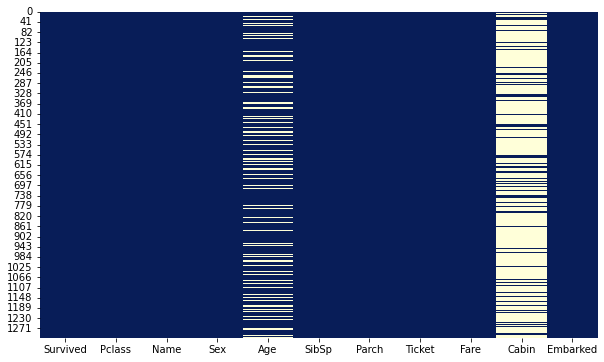

In [149]:
# This is a graphical presentation of the variables where there is missing data
# The figsize helps enlarge our plot to give a better visible view
plt.subplots(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='YlGnBu_r')

categorical_variable = ['Survived', 'Sex',
                        'Pclass', 'SibSp', 'Parch', 'Embarked']


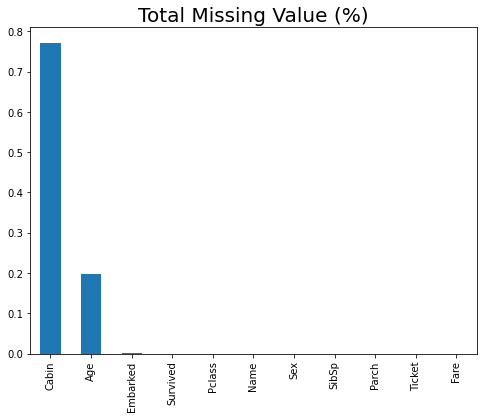

In [150]:
# Plotting the missing values of the Title column
# Can use semicolon to avoid printing unnecessery lines in the output
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind='bar', figsize=(8, 6), fontsize=10)
plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.title('Total Missing Value (%)', fontsize=20);


In [151]:
# Percentage of values missing in each column
for column in train_df.columns:
    percentage = train_df[column].isnull().mean()
    print(f'{column}: {round(percentage*100,4)}%')


Survived: 0.0%
Pclass: 0.0%
Name: 0.0%
Sex: 0.0%
Age: 20.0917%
SibSp: 0.0%
Parch: 0.0%
Ticket: 0.0%
Fare: 0.0764%
Cabin: 77.4637%
Embarked: 0.1528%


Cabin and Age columns have the largest percentage of missing values, Embarked and Fare columns have small percentage of missing values

In [152]:
categorical_variable

['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

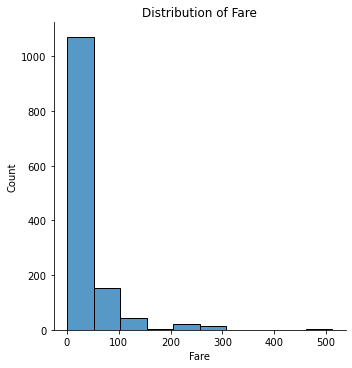

In [280]:
# Distribution plot of Fare values as it is numerical values
sns.displot(train_df['Fare'], kde=False, bins=10).set(
    title='Distribution of Fare');

/Users/prasad/opt/anaconda3/envs/Titanic/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Age Distribution')

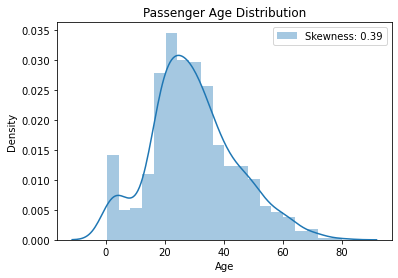

In [153]:
# Passenger age distribution 
# We are using distplot function here insted of newer histplot function as the distribution line shows in the distplot

sns.distplot(df_train['Age'], label='Skewness: %.2f' %
             (df_train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')

<AxesSubplot:>

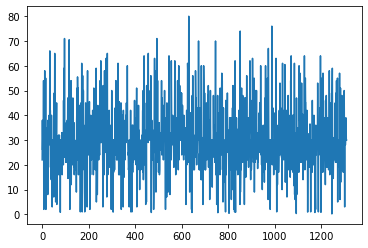

In [269]:
train_df['Age'].plot()

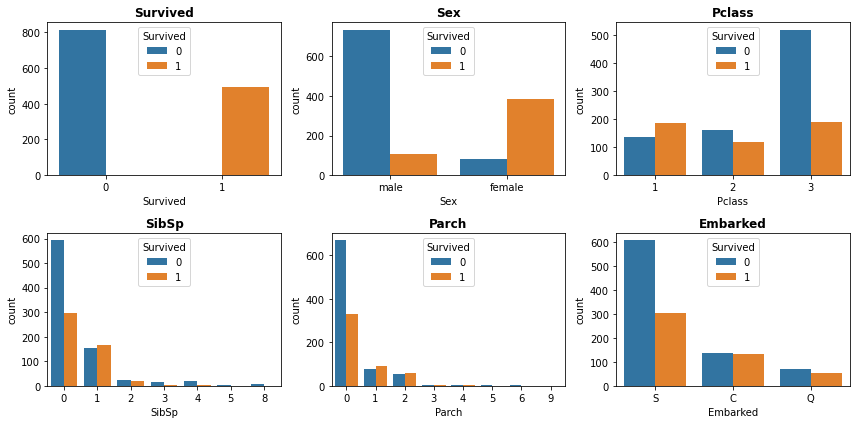

In [154]:
# Showing the plots of categorical variables grouped together. 
# Our desired number of plots per row and column
categorical_plot_nrows = 2
categorical_plot_ncols = 3

# figsize is used to define the size of plot area
fig, axs = plt.subplots(categorical_plot_nrows, categorical_plot_ncols, figsize=(
    categorical_plot_ncols*4, categorical_plot_nrows*3))

for r in range(0, categorical_plot_nrows):
    for c in range(0, categorical_plot_ncols):
        i = r*categorical_plot_ncols+c
        ax = axs[r][c]
        sns.countplot(x=train_df[categorical_variable[i]],
                      hue=train_df['Survived'], ax=ax)
        ax.set_title(categorical_variable[i], fontsize=12, fontweight='bold')
        ax.legend(title='Survived', loc='upper center')

plt.tight_layout()


### Visualize the Survival rate of the Passengers using
- Bar chart
- Pie chart
- Line graphs

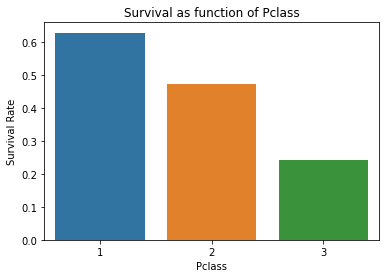

In [155]:
# Bar chart showing Survival rate of passengers per Class
sns.barplot(x='Pclass', y='Survived', data=df_train,ci = None)
plt.ylabel('Survival Rate')
plt.title('Survival as function of Pclass')
plt.show()

In [156]:
# Using a different function 'groupby' to show the mean of survival by Class

survived_by_class = df_train.groupby('Pclass')['Survived'].mean()

survived_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

/Users/prasad/opt/anaconda3/envs/Titanic/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


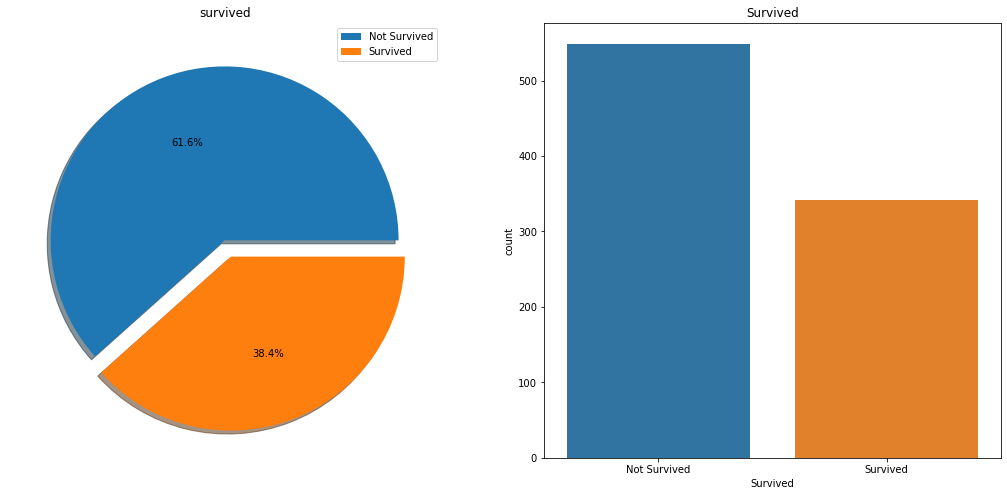

In [157]:
# A pie chart with a barchart showing the percentage of Survived and Deceased in the Titanic Data

f,ax=plt.subplots(1,2,figsize=(18,8)) # 1 row , 2 columns subplots 
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels = None)

ax[0].set_title('survived') 
ax[0].set_ylabel('')

ax[0].legend(labels=['Not Survived','Survived'], loc='best')
sns.countplot('Survived',data=df_train,ax=ax[1])

ax[1].set_title('Survived') # ax[0] & ax[1] are different axis for different plots.
plt.xticks([0,1],['Not Survived','Survived']);

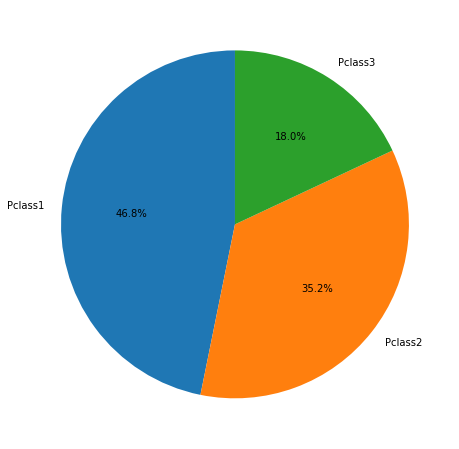

In [279]:
# Using a Pie chart to visualize the Survival rate by Class
y = survived_by_class
mylabels = ['Pclass1', 'Pclass2', 'Pclass3']
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(y, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.show()

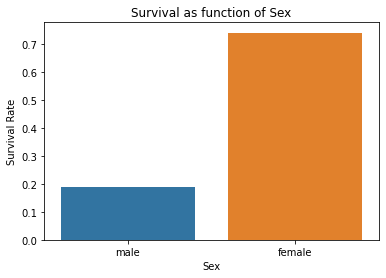

In [159]:
# Bar chart showing Survival rate of passengers per Sex
sns.barplot(x='Sex', y='Survived', data=df_train,ci = None)
plt.ylabel('Survival Rate')
plt.title('Survival as function of Sex')
plt.show()

One can immediately see that females survived in much higher proportions than males did.

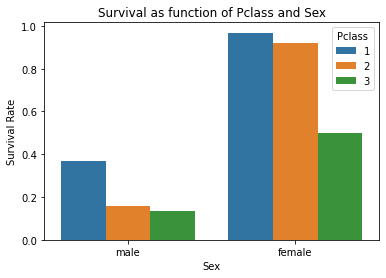

In [160]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train,ci = None)
plt.ylabel('Survival Rate')
plt.title('Survival as function of Pclass and Sex')
plt.show()

One way to look at distribution of age values in a continuous numerical set is to use histograms. We create two histograms to compare visually the those that survived vs those who died across different age ranges.

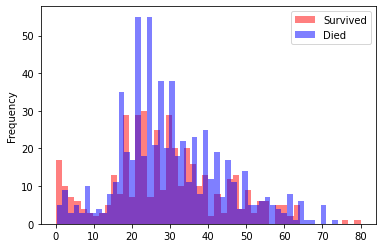

In [162]:
survived = train_df[train_df["Survived"] == 1]
died = train_df[train_df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived. Where the red bars are higher than the blue bars.

/Users/prasad/opt/anaconda3/envs/Titanic/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


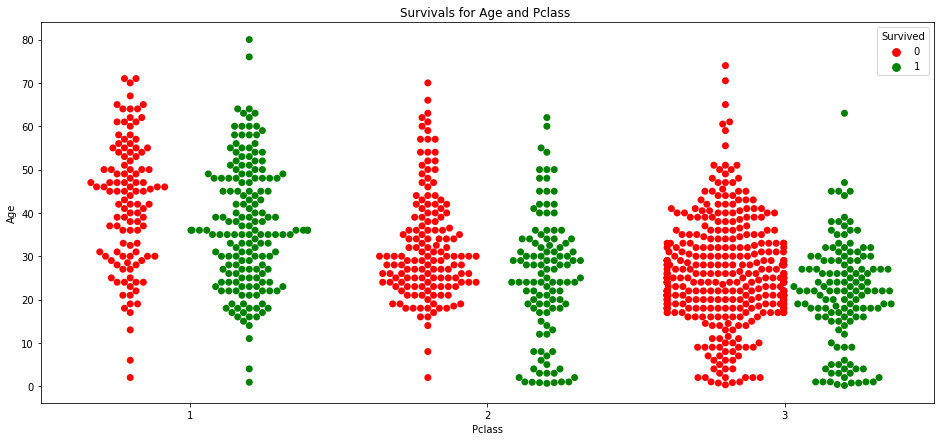

In [164]:
# Using a swarm plot to visualise Survival of the Classes by Age of the Passengers
# There were User Warnings that somen points could not be placed and to decrease the size of the markers
# The marker sizes were decreased and the User warnings decreased. 
# The size of the markers did not reduce further as the plot become less descriptive 
swarm_color = ['red', 'green']
fig, ax = plt.subplots(figsize=(16, 7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', dodge=True,
              data=train_df, palette=swarm_color, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

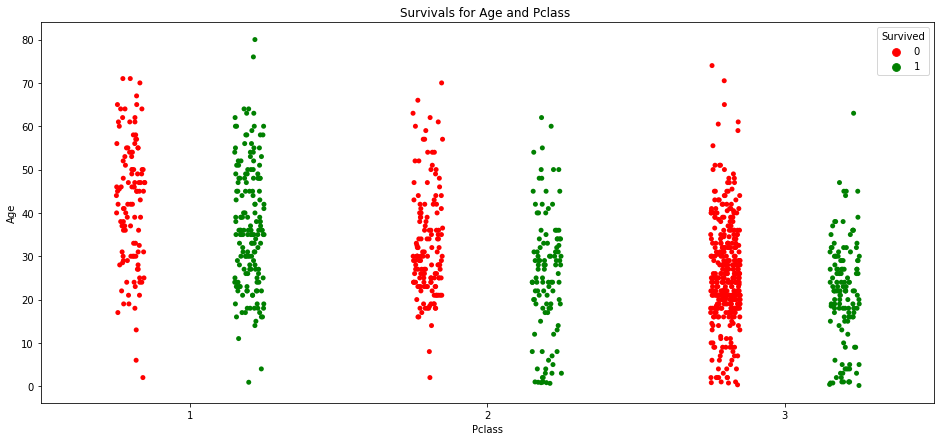

In [165]:
# Using the Stripplot function to visualise Survival of Classes by Age of Passengers (This had no warnings)
swarm_color = ['red', 'green']
fig, ax = plt.subplots(figsize=(16, 7))
sns.stripplot(x='Pclass', y='Age', hue='Survived', dodge=True,
              data=train_df, palette=swarm_color, size=5, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

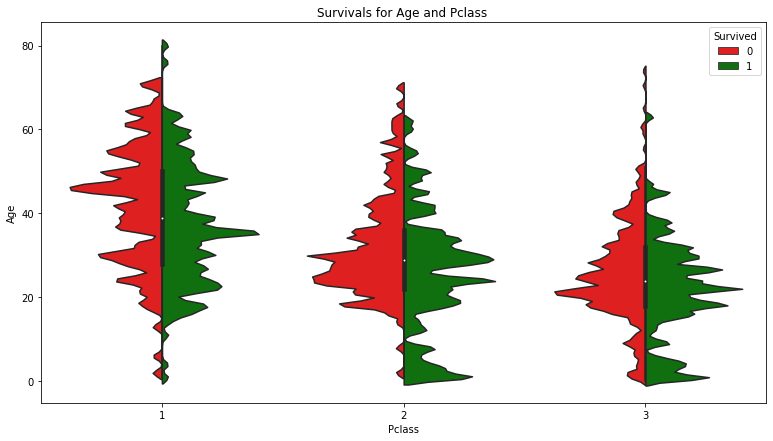

In [166]:
# Using a Violin plot to show the Survival rate of Classes by Age of Passengers
fig, ax = plt.subplots(figsize=(13, 7))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df,
               split=True, bw=0.05, palette=swarm_color, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()


/Users/prasad/opt/anaconda3/envs/Titanic/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


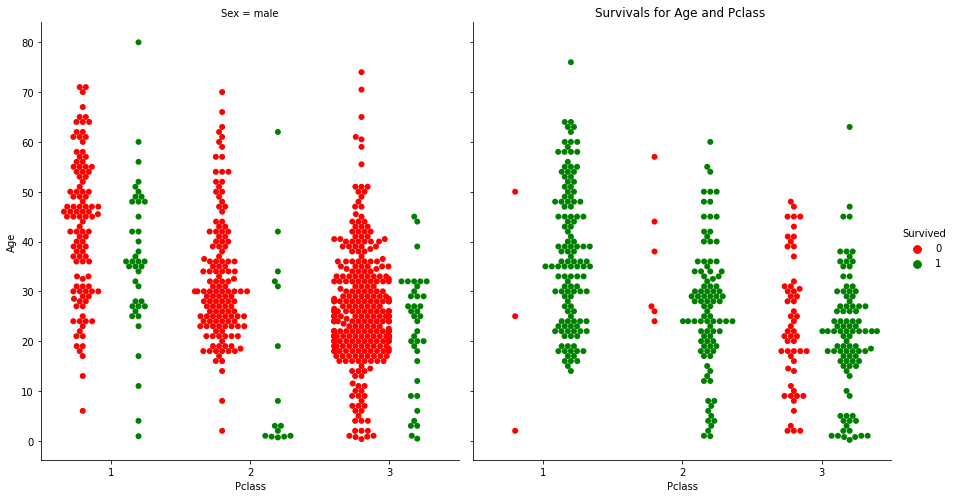

In [167]:
# Using a cat plot to visualise Survival of the Classes by Age of the Passengers
# There were User Warnings that somen points could not be placed and to decrease the size of the markers
# The marker sizes were decreased and the User warnings decreased
# The size of the markers did not reduce further as the plot become less descriptive 
g = sns.catplot(x='Pclass', y='Age', hue='Survived', col='Sex', data=train_df,
                kind='swarm', dodge=True, palette=swarm_color, height=7, aspect=.9, s=6)
plt.title('Survivals for Age and Pclass ')
plt.show()


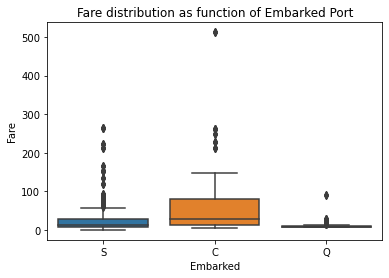

In [168]:
sns.boxplot(x='Embarked', y='Fare', data=train_df)
plt.title('Fare distribution as function of Embarked Port')
plt.show()


The boxplot above shows the distribution of fare based on the port of embarkation. There are several outliers much different from the other values.
Below is shown the observations for values above 500

In [169]:
train_df[train_df['Fare'] > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


The ticket numbers are the same but with different cabin numbers. However, it can be assumed that these passengers travelled together as a group

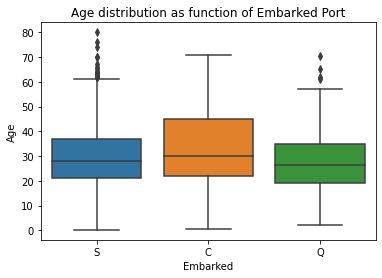

In [170]:
sns.boxplot(x='Embarked', y='Age', data=train_df)
plt.title('Age distribution as function of Embarked Port')
plt.show()


This box plot above shows the Age distribution based on the port of Embarkation. At Southampton, the median age is around 28 and at Cherbourg the median age was just above 30. At Queenstown, the median age was around 26. There are outliers in Southhampton and Queenstown, but none in Cherbourg.

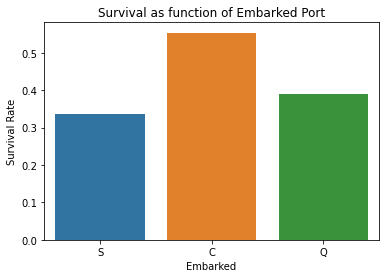

In [171]:
sns.barplot(x='Embarked', y='Survived', data=df_train,ci = None)
plt.ylabel('Survival Rate')
plt.title('Survival as function of Embarked Port')
plt.show()

The barplot above shows the survival rate of passengers embarked at each port. Cherbourg has the highest rate of survivors closer to 50% and the lowest is from Southampton at just above 30%.

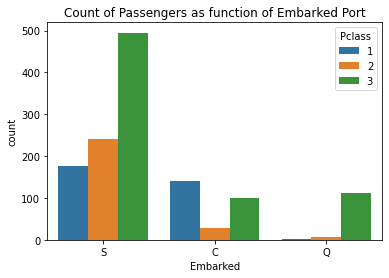

In [172]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
plt.title('Count of Passengers as function of Embarked Port')
plt.show()


In the barplot above, the number of passengers per class from the three ports can be observed. The highest in green, representing third class, is the highest at nearly 500. The lowest number of passengers per class is from Queenstown for first class is just above 1.

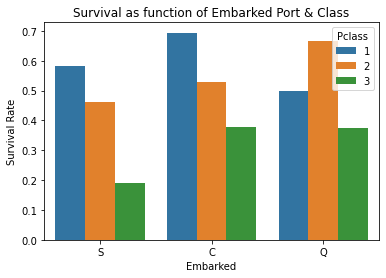

In [173]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=df_train,ci = None)
plt.ylabel('Survival Rate')
plt.title('Survival as function of Embarked Port & Class')
plt.show()


The barplot above shows the survival rate based on the port of embarkation and class. The highest survival rate is from first class, at Cherbourg, close to 70%. The lowest rate of survival based on these two variables is from third class at Southhampton, close to 20%. 

## Basic statistics to clean data to identify and remove missing values

In [174]:
# The average age of passengers
train_df['Age'].mean()


29.881137667304014

In [175]:
# Median Age and Ticket fare price of Pax
# train_df[['Age', 'Fare']].median()

# Summary of the dataset
# train_df.describe(include='all')

# Instead of using above predifined 'describe function' we can combined aggregating statistics which gives the same result
train_df.agg(
    {
        'Age': ['min', 'max', 'mean', 'median', 'skew'],
        'Fare': ['min', 'max', 'mean', 'median', 'skew'],
    })


,Age,Fare
min,0.170000,0.000000
max,80.000000,512.329200
mean,29.881138,33.295479
median,28.000000,14.454200
skew,0.407675,4.367709


In [176]:
# Counting by passenger class
train_df.groupby('Pclass')['Pclass'].count()


Pclass
1    323
2    277
3    709
Name: Pclass, dtype: int64

In [177]:
# Checking for missing values in dataframe. True is missing values and False is for no missing values.

df_train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [178]:
# Check for missing values across columns

df_train.isnull().any()  

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [179]:
# Count of missing values of the entire dataframe
df_train.isnull().sum().sum()   

866

In [180]:
# Count of missing values across columns
count_NAN = len(df_train) - df_train.count()
count_NAN

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [181]:
max_missing = 0
# Count of missing values across rows
for i in range(len(df_train.index)):  
    missing_current_row = df_train.iloc[i].isnull().sum()
    if(max_missing < missing_current_row):
        max_missing = missing_current_row

print('maximum null values in a row : ', max_missing, '.',
      '\nTherefore, dropping rows containing missing values are disadvantageous. Dropping the entire rows are unneeded')
print()


maximum null values in a row :  2 . 
Therefore, dropping rows containing missing values are disadvantageous. Dropping the entire rows are unneeded



In [182]:
# Counting of missing values of a particular column
df_train.Age.isnull().sum()


177

In [183]:
# Count of missing values of column by group
'''count of missing values of column by group
 Because we dont havve missing values in sex all the missing values is coming from Age'''
df_train.groupby(['Sex'])['Age'].apply(lambda x: x.isnull().sum())


Sex
female     53
male      124
Name: Age, dtype: int64

In [184]:
# Detecting outliers
def detect_outliers(df, n, features):
    
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(
        key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers
outliers_to_drop = detect_outliers(train_df, 2, ['Age', 'SibSp', 'Parch', 'Fare'])


print('Indexes of the detected outliers', outliers_to_drop)


Indexes of the detected outliers []


# Data wrangling
## Fixing missing values

In [185]:
# Replacing the na in age and Fare column with mean
train_df['Age'] = train_df['Age'].fillna(round(train_df['Age'].mean()))
train_df['Fare'] = train_df['Fare'].fillna(round(train_df['Fare'].mean()))

# checking if there are any remaining missing value
print('Number of missing values remaining in Age column is',
      train_df.Age.isnull().sum())
print('Number of missing values remaining in Fare column is',
      train_df.Fare.isnull().sum())


Number of missing values remaining in Age column is 0
Number of missing values remaining in Fare column is 0


In [186]:
# Grouping sex and Age columns and calculation the mean values
# Then rounding the result to 3 decimal points
train_df.groupby(['Sex'])['Age'].mean().round(3).values


array([28.907, 30.457])

In [187]:
# Replace missing values with mode of the Embarked column
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('Number of missing values remaining in Embarked column is',train_df.Fare.isnull().sum())


Number of missing values remaining in Embarked column is 0


In [188]:
# See if there is still any missing data in train dataset
print('Missing value remaining in the dataset', train_df.isna().sum().max())
print('Missing values of the Cabin column', train_df.Cabin.isnull().sum())
print('It is clear that all the remaining missing values are from Cabin column. At his point, not going to impute missing values in Cabin variable as there are more than 60% of the values are missing.')


Missing value remaining in the dataset 1014
Missing values of the Cabin column 1014
It is clear that all the remaining missing values are from Cabin column. At his point, not going to impute missing values in Cabin variable as there are more than 60% of the values are missing.


Fare seems to be the only feature that has a substantial correlation with survival


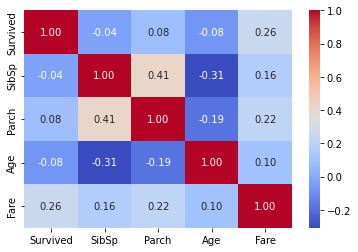

In [189]:
# Numerical variables correlation with survival

sns.heatmap(df_train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

print('Fare seems to be the only feature that has a substantial correlation with survival')

## Transforming the column values
### Transforming Survived and Pclass columns from integer to String
Values are transformed form numerical values to categotical values as it is easier to understand the data in the exploratary analysis.
Also, after the transformation, graph lables become more discriptive and easier to understand.

### Renaming Embarked column values to their proper Embarcation port
This will make data more understandable in data exploration.

In [190]:
# Embarked column values: maped C -> Cherbourg, Q -> Queenstown and S -> Southampton
train_df.loc[train_df['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'
train_df.loc[train_df['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'
train_df.loc[train_df['Embarked'] == 'S', 'Embarked'] = 'Southampton'
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [191]:
# Create copies of dataframe before transforming numeric values to categorical values
df_train = train_df.copy()
data = train_df.copy()


In [192]:
# Survived column values: maped 1 -> Survived and 0 -> Deceased
train_df.loc[train_df['Survived'] == 0, 'Survived'] = 'Deceased'
train_df.loc[train_df['Survived'] == 1, 'Survived'] = 'Survived'
train_df['Survived'].head()


0    Deceased
1    Survived
2    Survived
3    Survived
4    Deceased
Name: Survived, dtype: object

In [193]:
# Pclass column values: maped 1 -> First Class, 2 -> Second Class and 3 -> Third Class
train_df.loc[train_df['Pclass'] == 1, 'Pclass'] = 'First Class'
train_df.loc[train_df['Pclass'] == 2, 'Pclass'] = 'Second Class'
train_df.loc[train_df['Pclass'] == 3, 'Pclass'] = 'Third Class'
train_df['Pclass'].head()


0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Pclass, dtype: object

## Data visualisation

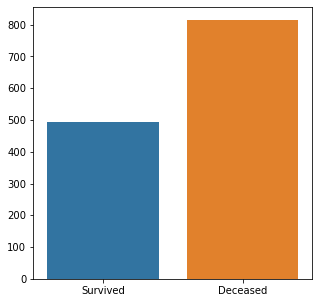

In [194]:
plt.figure(figsize=(5, 5))
survival_labels = ['Survived', 'Deceased']
survival_counts = [train_df.Survived.value_counts(
)[1], train_df.Survived.value_counts()[0]]
sns.barplot(x=survival_labels, y=survival_counts)
plt.show()


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

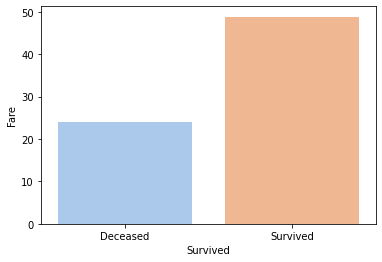

In [195]:
sns.barplot(x='Survived', y='Fare', data=train_df, palette='pastel',ci=None)


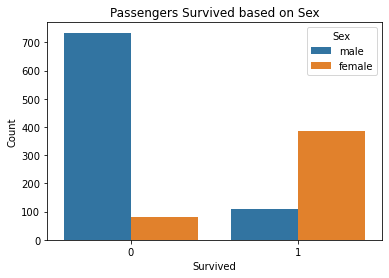

In [196]:
sns.countplot(x='Survived', hue='Sex', data=df_train).set(
    title='Passengers Survived based on Sex', ylabel='Count');


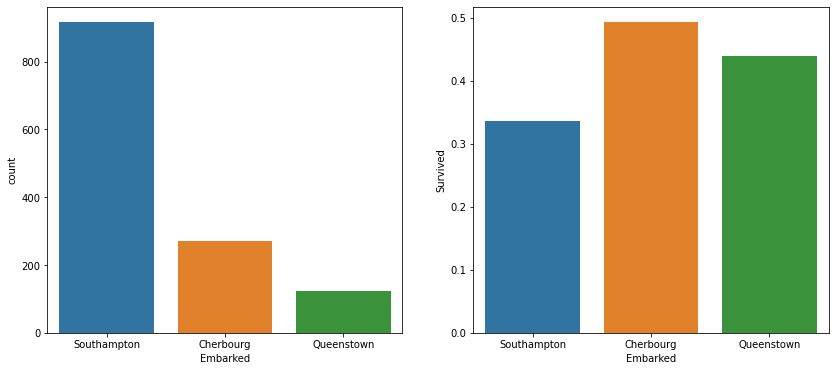

In [197]:
train_data_clean_embarked = df_train.dropna(subset=['Embarked'])
embarked = train_data_clean_embarked.groupby('Embarked').mean()
embarked['Count'] = train_data_clean_embarked['Embarked'].value_counts()
embarked

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Embarked', data=train_data_clean_embarked, order=[
              'Southampton', 'Cherbourg', 'Queenstown'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=[
            'Southampton', 'Cherbourg', 'Queenstown'], ax=axis2);


## Analysing familysize

### Visualize surviving families using title

In [198]:
data = df_train.drop(columns=['Name', 'Ticket', 'Cabin'])
data.tail()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1304,0,3,male,30.0,0,0,8.0500,Southampton
1305,1,1,female,39.0,0,0,108.9000,Cherbourg
1306,0,3,male,38.5,0,0,7.2500,Southampton
1307,0,3,male,30.0,0,0,8.0500,Southampton
1308,0,3,male,30.0,1,1,22.3583,Cherbourg


In [199]:
#df_train = train_df.copy()

This is a subplot showing the relationship between the titles of the passengers and their survival rate side by side in the two plots

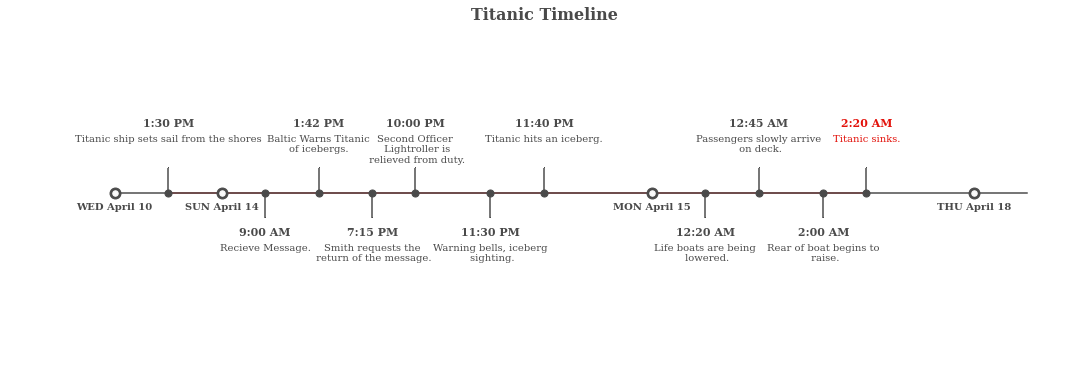

In [200]:
##Titanic  date and time until crash
from datetime import datetime
 
tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]
 
tl_x = [1, 2, 6, 9]
 
tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]
 
tl_text = [
    "Titanic ship sets sail from the shores",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.",
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relieved from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]
 
# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)
 
# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a', zorder=4)
 
# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a')
 
# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(
    tl_sub_x, levels, use_line_collection=True)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')
 
# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx % 2)-0.5, time, ha='center',
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx != len(tl_sub_x) else '#e3120b', fontsize=11)
 
    ax.text(x, 1.3*(idx % 2)-0.6, txt, va='top', ha='center',
            fontfamily='serif', color='#4a4a4a' if idx != len(tl_sub_x) else '#e3120b')
 
# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
 
# Ticks
ax.set_xticks([])
ax.set_yticks([])
 
# Title
ax.set_title("Titanic Timeline", fontweight="bold",
             fontfamily='serif', fontsize=16, color='#4a4a4a')
 
plt.show()

Using python codes, this is a precise graphical visualization of the timeline of the titanic disaster from when the ship set sail at 1.30pm to the time when the warning was sent to the titanic and when the crash happened at 2.20am

In [201]:
# Calculate variance using a function

def variance_calculator(df_variable):
    sum_variable = 0
    for value in df_variable:
        if (isnan(value) != True):
            sum_variable += value
    mean = sum_variable/len(df_variable)

    sum_of_squares = 0
    for value in df_variable:
        if (isnan(value) != True):
            sum_of_squares += value ** 2
    mean_squares = sum_of_squares/len(df_variable)

    return mean_squares - mean**2

# The above calculation can also be done using the method numpy.var
# np.var(df_variable)

In [202]:
print(
    f'Variance of Fare calculated using the defined function {round(variance_calculator(train_df.Fare),2)}')
print(
    f'Variance of Fare calculated using numpy function {round(np.var(train_df.Fare),2)}')

Variance of Fare calculated using the defined function 2674.87
Variance of Fare calculated using numpy function 2674.87


In [203]:
data['Sex'].replace('female', 0, inplace=True)
data['Sex'].replace('male', 1, inplace=True)

data['Embarked_S'] = data['Embarked'].replace(
    'Queenstown', 0).replace('Cherbourg', 0).replace('Southampton', 1)
data['Embarked_C'] = data['Embarked'].replace(
    'Queenstown', 0).replace('Southampton', 0).replace('Cherbourg', 1)
data['Embarked_Q'] = data['Embarked'].replace(
    'Southampton', 0).replace('Cherbourg', 0).replace('Queenstown', 1)


In [204]:
data = data.drop(columns=['Embarked'])


In [205]:
x = data.iloc[:, 0:12]


In [206]:
x = data.drop(columns=['Survived'])
y = data['Survived']
x


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3,1,22.0,1,0,7.2500,1,0,0
1,1,0,38.0,1,0,71.2833,0,1,0
2,3,0,26.0,0,0,7.9250,1,0,0
3,1,0,35.0,1,0,53.1000,1,0,0
4,3,1,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...
1304,3,1,30.0,0,0,8.0500,1,0,0
1305,1,0,39.0,0,0,108.9000,0,1,0
1306,3,1,38.5,0,0,7.2500,1,0,0
1307,3,1,30.0,0,0,8.0500,1,0,0


In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [208]:
num_col = [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [209]:
trans = make_column_transformer((StandardScaler(), num_col),remainder='passthrough')
set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

In [210]:
model = KNeighborsClassifier(11)
pipe = make_pipeline(trans, model)
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [211]:
model


KNeighborsClassifier(n_neighbors=11)

In [212]:
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [213]:
pipe.fit(x_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [214]:
pred = pipe.predict(x_test)
accuracy_score(pred, y_test)*100


84.47837150127226

### Extract title from name

In [215]:
df_data = df_train.copy()
df_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,Southampton
1305,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg
1306,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton
1307,0,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,Southampton


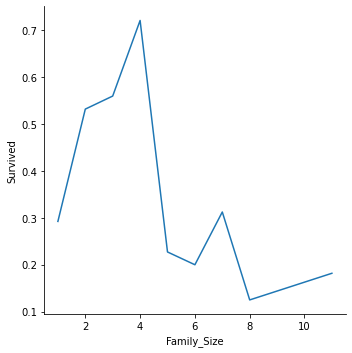

In [216]:
df_data['Family_Size'] = df_data['SibSp']+df_data['Parch']+1
g = sns.relplot(data=df_data, x='Family_Size', y='Survived',kind='line',ci=None)

Survival rate was highest for a family of 4 at 0.7 and lowest for a family of 8 at around 0.15

In [217]:
#Titles were extracted from the names of the passengers
df_data['Title'] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df_data['Title'], df_data['Sex']).T


Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [218]:
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady',
                                             'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 'Rare')

df_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().round(3)


,Title,Survived
0,Master,0.377
1,Miss,0.788
2,Mr,0.107
3,Mrs,0.868
4,Rare,0.412


Survival rate was the higest for passengers with the title Mrs. and lowest for passengers with the title Mr.

In [219]:
T = df_data.groupby(['Title'])['Age'].mean().round(3).values
T


array([ 8.698, 23.356, 31.729, 36.036, 41.912])

In [220]:
# Passengers with titles like 'Capt', 'Lady' , 'Dr', were grouped under Rare
df_data['Title'] = df_data['Title'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady',
                                             'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 'Rare')

df_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().round(3)


,Title,Survived
0,Master,0.377
1,Miss,0.788
2,Mr,0.107
3,Mrs,0.868
4,Rare,0.412


In [221]:
#Encoding title into numerical values and used it to create a new column called 'Title_Code'
df_data['Title_Code'] = df_data['Title'].astype('category').cat.codes


In [222]:
Ti_pred = df_data.groupby('Title')['Age'].mean().values
df_data['Ti_Age'] = df_data['Age']

for i in range(len(df_data['Title_Code'].unique())):
    df_data.loc[(df_data.Age.isnull()) & (
        df_data.Title_Code == i), 'Ti_Age'] = Ti_pred[i]

df_data['Ti_Age'] = df_data['Ti_Age'].astype('int')

df_data['Ti_Minor'] = ((df_data['Ti_Age']) < 18.0) * 1


### Classifier for family size


In [223]:
#Encoding female as 0 and male as 1 to classify family size
df_data['Sex'].replace('female', 0, inplace=True)
df_data['Sex'].replace('male', 1, inplace=True)
df_data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Title,Title_Code,Ti_Age,Ti_Minor
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,2,Mr,2,22,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,2,Mrs,3,38,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,1,Miss,1,26,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,Southampton,2,Mrs,3,35,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Southampton,1,Mr,2,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,NaN,Southampton,1,Mr,2,30,0
1305,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,Cherbourg,1,Rare,4,39,0
1306,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,1,Mr,2,38,0
1307,0,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,NaN,Southampton,1,Mr,2,30,0


In [224]:
# Columns below are dropped from independent variables for the Random Classifier 
x1 = df_data.drop(['Survived', 'Name', 'Ticket',
                  'Cabin', 'Title', 'Embarked'], axis=1)
# The dependent variable for the Random Classifier 
y1 = df_data['Survived']
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size=0.33, random_state=3)


In [225]:
num_col = [0, 1, 2, 3, 4, 5, 6, 7, 8]


In [226]:
# Transform the columns with standard scaler
trans = make_column_transformer((StandardScaler(), num_col),
                                remainder='passthrough')
set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8])])

## KNeighborsClassifier

Using feature similarities to classify the data set

In [227]:
# KNeighborsClassifier with k value of 11
model = KNeighborsClassifier(11)
pipe = make_pipeline(trans, model)
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

In [228]:
# Fit titanic data to the KNeighborsClassifier
pipe.fit(x1_train, y1_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=11))])

## Random Forest Classifier

In [229]:
# Encoding Embarked column to numerical variable
df_data['Embarked_Code'] = df_data['Embarked'].astype('category').cat.codes


In [230]:
# Encoding Sex column to numerical variable
df_data['Sex_Code'] = df_data['Sex'].astype('category').cat.codes


In [231]:
# Transform Fare column to 5 different observations
df_data['Fare_Code'] = pd.qcut(df_data['Fare'], 5)
label = LabelEncoder()
df_data['Fare_Code'] = label.fit_transform(df_data['Fare_Code'])
pd.crosstab(df_data['Fare_Code'], df_data['Pclass'])


Pclass,1,2,3
Fare_Code,,,
0,8,6,261
1,0,36,218
2,0,124,134
3,95,99,69
4,220,12,27


In [232]:

Ti_pred = df_data.groupby('Title')['Age'].mean().values
df_train['Ti_Age'] = df_data['Age']

for i in range(len(df_data['Title_Code'].unique())):
    df_data.loc[(df_data.Age.isnull()) & (
        df_data.Title_Code == i), 'Ti_Age'] = Ti_pred[i]

df_train['Ti_Age'] = df_data['Ti_Age'].astype('int')

df_train['Ti_Minor'] = ((df_data['Ti_Age']) < 18.0) * 1


In [233]:
df_data = df_data[:len(df_data)]
df_test = df_data[len(df_data):]
# Column Survived dropped from independent variables
X1 = df_data.drop(labels=['Survived'], axis=1)
# Survived column selected for the dependent variable
Y1 = df_data['Survived']
# Print dependent variables
X1.columns


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_Size', 'Title', 'Title_Code', 'Ti_Age',
       'Ti_Minor', 'Embarked_Code', 'Sex_Code', 'Fare_Code'],
      dtype='object')

In [234]:
# Column Survived dropped from independent variables for the Random Forest Classifier
Features = ['Pclass', 'Sex_Code', 'Fare_Code', 'Embarked_Code', 'Ti_Minor']
Model = RandomForestClassifier(
    random_state=2, n_estimators=250, min_samples_split=20, oob_score=True)
Model.fit(X1[Features], Y1)
# Out of bag error used to estimate the prediction error of the Random Forest Classifier
print('oob_score: %.5f' % (Model.oob_score_))


oob_score: 0.86784


In order for Age to be useful to our machine learning model, we can change continuous Age variable into a categorical feature by dividing it into ranges.

In [235]:
# Data transformation of Age column
# Grouping age values

train_df.loc[train_df['Age'].round() <= 10, 'age_group'] = 'children'
train_df.loc[train_df['Age'].round().between(11, 18), 'age_group'] = 'teenage'
train_df.loc[train_df['Age'].round().between(18, 60), 'age_group'] = 'adult'
train_df.loc[train_df['Age'].round() > 60, 'age_group'] = 'elder'


# Age grouping using mean values
train_df.loc[train_df['Age'].round() <= 10, 'mean_age'] = 5
train_df.loc[train_df['Age'].round().between(11, 20), 'mean_age'] = 15
train_df.loc[train_df['Age'].round().between(21, 30), 'mean_age'] = 25
train_df.loc[train_df['Age'].round().between(31, 40), 'mean_age'] = 35
train_df.loc[train_df['Age'].round().between(41, 50), 'mean_age'] = 45
train_df.loc[train_df['Age'].round().between(51, 60), 'mean_age'] = 55
train_df.loc[train_df['Age'].round().between(61, 70), 'mean_age'] = 65
train_df.loc[train_df['Age'] > 70, 'mean_age'] = 75


In [236]:
print('Maximum of Fare: ', df_train['Fare'].max())
print('Minimum of Fare: ', df_train['Fare'].min())
print('Mean of the Fare: ', train_df['Fare'].mean())

# Grouping of the Fare variable
train_df.loc[train_df['Fare'].round() <= 100, 'binned_fare'] = 50
train_df.loc[train_df['Fare'].round().between(101, 200), 'binned_fare'] = 150
train_df.loc[train_df['Fare'].round().between(201, 300), 'binned_fare'] = 250
train_df.loc[train_df['Fare'].round().between(301, 400), 'binned_fare'] = 350
train_df.loc[train_df['Fare'].round().between(401, 500), 'binned_fare'] = 450
train_df.loc[train_df['Fare'] > 500, 'binned_fare'] = 550


Maximum of Fare:  512.3292
Minimum of Fare:  0.0
Mean of the Fare:  33.29525355233006


In [237]:
train_df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,binned_fare
0,Deceased,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,adult,25.0,50.0
1,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,adult,35.0,50.0
2,Survived,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,adult,25.0,50.0
3,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,adult,35.0,50.0
4,Deceased,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,adult,35.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Deceased,Third Class,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,Southampton,adult,25.0,50.0
1305,Survived,First Class,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cherbourg,adult,35.0,150.0
1306,Deceased,Third Class,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,adult,35.0,50.0
1307,Deceased,Third Class,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,Southampton,adult,25.0,50.0


Family class with parent and children

SibSp: number of siblings/spouse

Parch: number of childre/parents

In [238]:
# Get pasengers who travel with family (either siblings,spouse, childre or parents)
# Copy rows which has values for either SibSp column or Parch
train_data_families = df_train.loc[(train_df['SibSp'] > 0) | (
    train_df['Parch'] > 0)][['Survived', 'Name', 'Sex', 'Age', 'Ticket', 'Pclass']]
train_data_families

,Survived,Name,Sex,Age,Ticket,Pclass
0,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,3
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,1
7,0,"Palsson, Master. Gosta Leonard",male,2.0,349909,3
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,3
...,...,...,...,...,...,...
1297,0,"Ware, Mr. William Jeffery",male,23.0,28666,2
1298,0,"Widener, Mr. George Dunton",male,50.0,113503,1
1300,1,"Peacock, Miss. Treasteall",female,3.0,SOTON/O.Q. 3101315,3
1302,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,19928,1


In [239]:
def extract_last_name(x):
    # String (x) will split by ',' and take the first element in the resulting list.
    # Then any whitespaces at the front and end of the first element will be truncated and returned
    return x.split(',')[0].strip()


In [240]:
# For each value in Name column, extract_last_name function to be used to create a new column LastName
train_data_families['LastName'] = train_data_families.Name.apply(
    extract_last_name)


### Person Class

Creating a Person class to store passengers travelling with family.Using the dataset created by filtering rows with non-zero values for variables SibSp(number of siblings/spouse) and Parch(number of childre/parents).

In [241]:
class Person:

    def __init__(self, survival, full_name, sex, age, ticket, last_name):
        self.last_name = last_name
        self.ticket = ticket
        self.full_name = full_name
        self.survival = survival
        self.age = age
        self.sex = sex


In [242]:
# Create a list to store person objects
list_of_pasengers = []
'''
This code is written by us. However, as DataFrame object alredy has a similar method, desided to use it to improve performance.
# Create list of tuples with selected column data
with_family_list = list(zip(train_data_families['Survived'], train_data_families['Name'], train_data_families['Sex'],
train_data_families['Age'], train_data_families['Ticket'], train_data_families['LastName']))

for item in with_family_list:
    p = Person(item[6], item[1], item[2], item[3], item[4], item[5])
    list_of_pasengers.append(p)
'''

for row in train_data_families.itertuples():
    p = Person(row[1], row[2], row[3], row[4], row[5], row[7])
    list_of_pasengers.append(p)



Considering only last names to group families, output could have errors as there can be different families with same last names.
Therefore, a variable created with ticket number  and last name used to identify families travelling together.

In [243]:
# Creating a dictionary to store family members
families_dict = {}
for p in list_of_pasengers:
    # Variable containing lastname and ticket number passed as key to the dictionary
    key = f'{p.last_name}_{p.ticket}'
    # If there is already an entry for a family person object will append to the family members list
    # Otherwise new list created with the person object
    if (key in families_dict):
        families_dict[key].append(p)
    else:
        families_dict[key] = [p]


In [244]:
print(f'From {len(df_train)} of total passengers, number of pasengers who have listed parent/child or spouse/sibling are {len(list_of_pasengers)}')
print(f'Among the {len(list_of_pasengers)} passengers who have recorded family, data set only had more than one family member for {len(families_dict)}. They are identified as family group')


From 1309 of total passengers, number of pasengers who have listed parent/child or spouse/sibling are 519
Among the 519 passengers who have recorded family, data set only had more than one family member for 240. They are identified as family group


In [245]:
# Create a dictionary for family who travelled as a group
family_group_dict = {}
# If the family has more than one member in the dataset, they are added to another dictionary
for key, value in families_dict.items():
    if len(value) > 1:
        family_group_dict[key] = value

print(f'Number of families travelled together is {len(family_group_dict)}')


Number of families travelled together is 170


In [246]:
class Family:
    # Number of family members
    no_of_members = 0
    # Percentage of survived female over 18 years
    s_f_adult_percentage = None
    # Percentage of survived male over 18 years
    s_m_adult_percentage = None
    # Percentage of survived children who are less than 10 years
    s_child_percentage = None
    # Percentage of survived female between 10 and 18 years
    s_f_child_percentage = None
    # Percentage of survived male between 10 and 18 years
    s_m_child_percentage = None

    def __init__(self, last_name,):
        self.last_name = last_name

    def set_no_of_members(self, n):
        self.no_of_members = n

    def set_survival_percent(self, gender, age, n, sn):
        if n != 0:
            if age == 'over18' and gender == 'female':
                self.s_f_adult_percentage = sn/n
            elif age == 'over18' and gender == 'male':
                self.s_m_adult_percentage = sn/n
            elif age == 'teen' and gender == 'female':
                self.s_f_child_percentage = sn/n
            elif age == 'teen' and gender == 'male':
                self.s_m_child_percentage = sn/n
            else:
                self.s_child_percentage = sn/n


Calculate the percentage of adult males and females who survived in families

In [247]:
# Total number of passengers
total_male = 0
total_female = 0
total_f_children = 0
total_m_children = 0
total_small_children = 0
# Number of passengers survived
number_f_adult_s = 0
number_m_adult_s = 0
number_f_child_s = 0
number_m_child_s = 0
number_small_child_s = 0
# Storing family objects in a list
family_list = []

# Each key value pair represent a family
# Each value in the families_dict dictionary is a list of family members
for key in family_group_dict:
    family = Family(key.split('_')[0])
    family.set_no_of_members(len(families_dict[key]))
    # Total number of passengers
    family_total_male = 0
    family_total_female = 0
    family_total_f_children = 0
    family_total_m_children = 0
    family_t_small_children = 0

    # Number of passengers survived
    family_number_f_adult_s = 0
    family_number_m_adult_s = 0
    family_number_f_child_s = 0
    family_number_m_child_s = 0
    family_n_small_child_s = 0

    for person in family_group_dict[key]:
        # Adults and children have separated based on age,
        # Three age groups less than 10, less than 18 and above 18 was created

        if person.age < 10:
            family_t_small_children += 1
            if(person.survival == 1):
                family_n_small_child_s += 1
        elif person.age < 18:
            #  Group over 10 and less than 18 further divided to male and female
            if (person.sex == 'male'):
                family_total_m_children += 1
                if(person.survival == 1):
                    family_number_m_child_s += 1
            else:
                family_total_f_children += 1
                if(person.survival == 1):
                    family_number_f_child_s += 1
        else:
            # Adult group further divided to male and female
            if (person.sex == 'male'):
                family_total_male += 1
                if(person.survival == 1):
                    family_number_m_adult_s += 1
            else:
                family_total_female += 1
                if(person.survival == 1):
                    family_number_f_adult_s += 1

    # Set values of observations for family object
    family.set_survival_percent(
        'female', 'over18', family_total_female, family_number_f_adult_s)
    family.set_survival_percent(
        'male', 'over18', family_total_male, family_number_m_adult_s)
    family.set_survival_percent(
        'female', 'teen', family_total_f_children, family_number_f_child_s)
    family.set_survival_percent(
        'male', 'teen', family_total_m_children, family_number_m_child_s)
    family.set_survival_percent(
        'none', 'child', family_t_small_children, family_n_small_child_s)
    family_list.append(family)

    # Add family counts to total
    total_male += family_total_male
    total_female += family_total_female
    total_f_children += family_total_f_children
    total_m_children += family_total_m_children
    total_small_children += family_t_small_children

    number_f_adult_s += family_number_f_adult_s
    number_m_adult_s += family_number_m_adult_s
    number_f_child_s += family_number_f_child_s
    number_m_child_s += family_number_m_child_s
    number_small_child_s += family_n_small_child_s

print('From ',len(df_train),'number of passenger in the ship,')
print( total_female, ' females over 18. travelled as family')
print(total_male, ' males over 18. travelled as family')
print(total_f_children, ' females under 18 and over 10. travelled as family')
print(total_m_children, ' males under 18 and over 10. travelled as family')
print(total_small_children, ' children under 10 travelled as family')

From  1309 number of passenger in the ship,
180  females over 18. travelled as family
154  males over 18. travelled as family
18  females under 18 and over 10. travelled as family
17  males under 18 and over 10. travelled as family
80  children under 10 travelled as family


In [248]:
print('When a passenger travelled as a family;')
print('Percentage of females survived ' +
      str(round(100 * number_f_adult_s/total_female)) + '%')
print('Percentage of males survived ' +
      str(round(100 * number_m_adult_s/total_male)) + '%')
print('Percentage of female aged between 10 and 18 years survived ' +
      str(round(100 * number_f_child_s/total_f_children)) + '%')
print('Percentage of male aged between 10 and 18 years survived ' +
      str(round(100 * number_m_child_s/total_m_children)) + '%')
print('Percentage of children less than 10 years old survived ' +
      str(round(100 * number_small_child_s/total_small_children)) + '%')


When a passenger travelled as a family;
Percentage of females survived 81%
Percentage of males survived 13%
Percentage of female aged between 10 and 18 years survived 78%
Percentage of male aged between 10 and 18 years survived 18%
Percentage of children less than 10 years old survived 58%


In [249]:
for family in family_list:
    print(f'{family.last_name} family has {family.no_of_members} members, from them;')
    if(family.s_f_adult_percentage != None):
        print(f'{family.s_f_adult_percentage*100}% adult females are survived')
    if(family.s_m_adult_percentage != None):
        print(f'{family.s_m_adult_percentage*100}% adult males are survived')
    if(family.s_f_child_percentage != None):
        print(f'{family.s_f_child_percentage*100}% over 10 years and under 18 females are survived')
    if(family.s_m_child_percentage != None):
        print(f'{family.s_m_child_percentage*100}% over 10 years and under 18 males are survived')
    if(family.s_child_percentage != None):
        print(f'{family.s_child_percentage*100}% under 10 children survived')
    print()

Cumings family has 2 members, from them;
100.0% adult females are survived
0.0% adult males are survived

Futrelle family has 2 members, from them;
100.0% adult females are survived
0.0% adult males are survived

Palsson family has 5 members, from them;
0.0% adult females are survived
0.0% under 10 children survived

Johnson family has 3 members, from them;
100.0% adult females are survived
100.0% under 10 children survived

Nasser family has 2 members, from them;
0.0% adult males are survived
100.0% over 10 years and under 18 females are survived

Sandstrom family has 3 members, from them;
100.0% adult females are survived
100.0% under 10 children survived

Andersson family has 7 members, from them;
0.0% adult females are survived
0.0% adult males are survived
0.0% over 10 years and under 18 females are survived
0.0% under 10 children survived

Rice family has 6 members, from them;
0.0% adult females are survived
0.0% over 10 years and under 18 males are survived
0.0% under 10 childre

## Building a Random Forest Classifier

### Random Forest Classifier with variables
- Pclass
- Sex
- SibSp
- Parch
- mean_age

In [250]:
# Create a copy of the dataset because some columns are transforming to numeric
rf_df = train_df.copy()
# Convert variables to numeric values
rf_df['Sex'] = rf_df['Sex'].replace(['female', 'male'], [0, 1])

rf_df.loc[rf_df['Survived'] == 'Deceased', 'Survived'] = 0
rf_df.loc[rf_df['Survived'] == 'Survived', 'Survived'] = 1

rf_df.loc[rf_df['Pclass'] == 'First Class', 'Pclass'] = 1
rf_df.loc[rf_df['Pclass'] == 'Second Class', 'Pclass'] = 2
rf_df.loc[rf_df['Pclass'] == 'Third Class', 'Pclass'] = 3

rf_df['Survived'] = rf_df['Survived'].astype('int')
rf_df['Pclass'] = rf_df['Pclass'].astype('int')
rf_df['mean_age'] = rf_df['mean_age'].astype('int')


In [251]:
# Split data into input and target variable(s)
X = rf_df.drop(['Survived', 'Name', 'Age', 'Ticket', 'Fare',
               'Cabin', 'Embarked', 'age_group', 'binned_fare'], axis=1)
y = rf_df['Survived']


In [252]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [253]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.20, random_state=42
)

In [254]:
# Create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)


RandomForestClassifier()

In [255]:
# Predictin on the test set
y_pred = classifier.predict(X_test)


In [256]:
# Calculate Model Accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.8358778625954199


## Building a model to predict survivor in the titanic using LogisticRegression


In [257]:
train_df = df_train[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

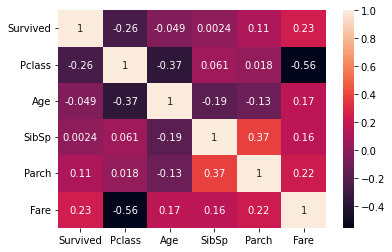

In [258]:
correlation = train_df.corr()
correlation
# The heat plot showing the correlation matrix
sns.heatmap(correlation, annot=True) ;

### Transforming the data to fit the predictive model


In [259]:
train_df.loc[train_df['Embarked'] == 'Cherbourg', 'Embarked'] = 1 
train_df.loc[train_df['Embarked'] == 'Queenstown', 'Embarked'] = 2 
train_df.loc[train_df['Embarked'] == 'Southampton', 'Embarked'] = 3

train_df.loc[train_df['Sex'] == 'male', 'Sex'] = 1 
train_df.loc[train_df['Sex'] == 'female', 'Sex'] = 2

In [260]:
# Splitting our data into train data set and test data set

x = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [261]:
print(x_train.shape)


(1047, 7)


In [262]:
print(y_train.shape)


(1047,)


In [263]:
print(x_test.shape)


(262, 7)


In [264]:
print(y_test.shape)

(262,)


In [265]:
# Fitting the model for Logistic Regression analysis
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/Users/prasad/opt/anaconda3/envs/Titanic/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [266]:
predictions = logisticRegr.predict(x_test)


In [267]:
score = logisticRegr.score(x_test, y_test)
print(score)


0.8587786259541985


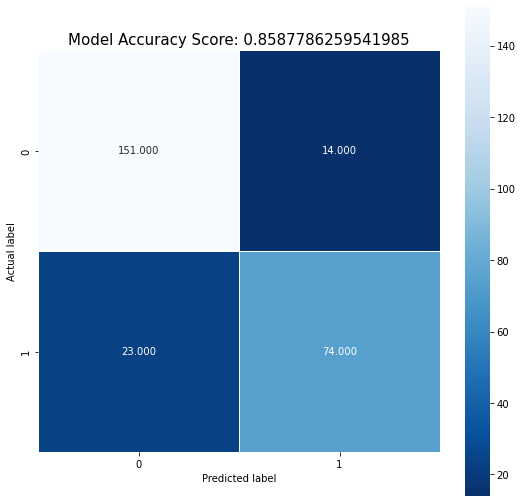

In [268]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix,annot=True, fmt='.3f', linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Model Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
